In [63]:
import sys
sys.path.insert(1,'./lib/python3.7/site-packages')
import pandas as pd
import numpy as np
import googletrans
import matplotlib.pyplot as plt; plt.rcdefaults() 


In [65]:
pip install googletrans==4.0.0-rc1

Note: you may need to restart the kernel to use updated packages.


In [67]:

df= pd.read_csv("amazon.csv", encoding= "ISO-8859-1", thousands='.')

In [69]:
df

,year,state,month,number,date
0,1998,Acre,Janeiro,0,01-01-1998
1,1999,Acre,Janeiro,0,01-01-1999
2,2000,Acre,Janeiro,0,01-01-2000
3,2001,Acre,Janeiro,0,01-01-2001
4,2002,Acre,Janeiro,0,01-01-2002
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128,01-01-2012
6450,2013,Tocantins,Dezembro,85,01-01-2013
6451,2014,Tocantins,Dezembro,223,01-01-2014
6452,2015,Tocantins,Dezembro,373,01-01-2015


In [71]:
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0,01-01-1998
1,1999,Acre,Janeiro,0,01-01-1999
2,2000,Acre,Janeiro,0,01-01-2000
3,2001,Acre,Janeiro,0,01-01-2001
4,2002,Acre,Janeiro,0,01-01-2002


In [73]:
df.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128,01-01-2012
6450,2013,Tocantins,Dezembro,85,01-01-2013
6451,2014,Tocantins,Dezembro,223,01-01-2014
6452,2015,Tocantins,Dezembro,373,01-01-2015
6453,2016,Tocantins,Dezembro,119,01-01-2016


In [75]:
df.shape

(6454, 5)

In [77]:
df.describe(include="all")

,year,state,month,number,date
count,6454.000000,6454,6454,6454.000000,6454
unique,NaN,23,12,NaN,20
top,NaN,Rio,Janeiro,NaN,01-01-1998
freq,NaN,717,541,NaN,324
mean,2007.461729,NaN,NaN,522.696312,NaN
std,5.746654,NaN,NaN,1554.846486,NaN
min,1998.000000,NaN,NaN,0.000000,NaN
25%,2002.000000,NaN,NaN,9.000000,NaN
50%,2007.000000,NaN,NaN,54.000000,NaN
75%,2012.000000,NaN,NaN,269.000000,NaN


In [79]:
df.isna()

,year,state,month,number,date
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
6449,False,False,False,False,False
6450,False,False,False,False,False
6451,False,False,False,False,False
6452,False,False,False,False,False


In [81]:
df.isna().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [83]:
df = df.replace(0, np.nan)

In [85]:
df

,year,state,month,number,date
0,1998,Acre,Janeiro,NaN,01-01-1998
1,1999,Acre,Janeiro,NaN,01-01-1999
2,2000,Acre,Janeiro,NaN,01-01-2000
3,2001,Acre,Janeiro,NaN,01-01-2001
4,2002,Acre,Janeiro,NaN,01-01-2002
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,01-01-2012
6450,2013,Tocantins,Dezembro,85.0,01-01-2013
6451,2014,Tocantins,Dezembro,223.0,01-01-2014
6452,2015,Tocantins,Dezembro,373.0,01-01-2015


In [87]:
df2 = df.dropna(subset = ['number'])

In [89]:
df2

,year,state,month,number,date
5,2003,Acre,Janeiro,10.0,01-01-2003
7,2005,Acre,Janeiro,12.0,01-01-2005
8,2006,Acre,Janeiro,4.0,01-01-2006
12,2010,Acre,Janeiro,1.0,01-01-2010
17,2015,Acre,Janeiro,1.0,01-01-2015
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,01-01-2012
6450,2013,Tocantins,Dezembro,85.0,01-01-2013
6451,2014,Tocantins,Dezembro,223.0,01-01-2014
6452,2015,Tocantins,Dezembro,373.0,01-01-2015


In [91]:
df2.describe(include="all")

,year,state,month,number,date
count,5837.000000,5837,5837,5837.000000,5837
unique,NaN,23,12,NaN,20
top,NaN,Rio,Outubro,NaN,01-01-2016
freq,NaN,661,534,NaN,317
mean,2007.834847,NaN,NaN,577.947918,NaN
std,5.649076,NaN,NaN,1625.176973,NaN
min,1998.000000,NaN,NaN,1.000000,NaN
25%,2003.000000,NaN,NaN,16.000000,NaN
50%,2008.000000,NaN,NaN,72.000000,NaN
75%,2013.000000,NaN,NaN,334.000000,NaN


In [93]:
forest_fire_per_month =  df2.groupby('month')['number'].sum()

In [95]:
forest_fire_per_month

month
Abril          28364.0
Agosto        740841.0
Dezembro      152596.0
Fevereiro      30952.0
Janeiro        52587.0
Julho         217620.0
Junho         111405.0
Maio           46083.0
Março          35118.0
Novembro      312326.0
Outubro       629665.0
Setembro     1015925.0
Name: number, dtype: float64

In [97]:
months_unique = list(df.month.unique())

In [99]:
months_unique

['Janeiro',
 'Fevereiro',
 'Março',
 'Abril',
 'Maio',
 'Junho',
 'Julho',
 'Agosto',
 'Setembro',
 'Outubro',
 'Novembro',
 'Dezembro']

In [101]:
forest_fire_per_month = forest_fire_per_month.reindex(months_unique, axis=0)

In [103]:
forest_fire_per_month

month
Janeiro        52587.0
Fevereiro      30952.0
Março          35118.0
Abril          28364.0
Maio           46083.0
Junho         111405.0
Julho         217620.0
Agosto        740841.0
Setembro     1015925.0
Outubro       629665.0
Novembro      312326.0
Dezembro      152596.0
Name: number, dtype: float64

In [105]:
print(forest_fire_per_month)

month
Janeiro        52587.0
Fevereiro      30952.0
Março          35118.0
Abril          28364.0
Maio           46083.0
Junho         111405.0
Julho         217620.0
Agosto        740841.0
Setembro     1015925.0
Outubro       629665.0
Novembro      312326.0
Dezembro      152596.0
Name: number, dtype: float64


In [107]:
forest_fire_per_month = forest_fire_per_month.to_frame()

In [109]:
forest_fire_per_month

,number
month,
Janeiro,52587.0
Fevereiro,30952.0
Março,35118.0
Abril,28364.0
Maio,46083.0
Junho,111405.0
Julho,217620.0
Agosto,740841.0
Setembro,1015925.0


In [111]:
forest_fire_per_month.reset_index(level=0, inplace= True )

In [113]:
forest_fire_per_month

,month,number
0,Janeiro,52587.0
1,Fevereiro,30952.0
2,Março,35118.0
3,Abril,28364.0
4,Maio,46083.0
5,Junho,111405.0
6,Julho,217620.0
7,Agosto,740841.0
8,Setembro,1015925.0
9,Outubro,629665.0


In [115]:
translator = googletrans.Translator()

for month in months_unique:
    detected = translator.detect(month)
    translated = translator.translate(month)
    print(detected)
    print(translated)
    print("...")

Detected(lang=pt, confidence=None)
Translated(src=pt, dest=en, text=January, pronunciation=None, extra_data="{'confiden...")
...
Detected(lang=pt, confidence=None)
Translated(src=pt, dest=en, text=February, pronunciation=None, extra_data="{'confiden...")
...
Detected(lang=pt, confidence=None)
Translated(src=pt, dest=en, text=March, pronunciation=None, extra_data="{'confiden...")
...
Detected(lang=pt, confidence=None)
Translated(src=pt, dest=en, text=April, pronunciation=None, extra_data="{'confiden...")
...
Detected(lang=pt, confidence=None)
Translated(src=pt, dest=en, text=May, pronunciation=None, extra_data="{'confiden...")
...
Detected(lang=pt, confidence=None)
Translated(src=pt, dest=en, text=June, pronunciation=None, extra_data="{'confiden...")
...
Detected(lang=pt, confidence=None)
Translated(src=pt, dest=en, text=July, pronunciation=None, extra_data="{'confiden...")
...
Detected(lang=it, confidence=None)
Translated(src=it, dest=en, text=August, pronunciation=None, extra_data="{'

In [117]:
translator2= googletrans.Translator()

for i,m in enumerate(forest_fire_per_month['month']):
    translated= translator2.translate(m)
    month1=translated.text
    forest_fire_per_month.at [i,'month']=month1

In [119]:
forest_fire_per_month

,month,number
0,January,52587.0
1,February,30952.0
2,March,35118.0
3,April,28364.0
4,May,46083.0
5,June,111405.0
6,July,217620.0
7,August,740841.0
8,September,1015925.0
9,October,629665.0


In [121]:
print(forest_fire_per_month)

        month     number
0     January    52587.0
1    February    30952.0
2       March    35118.0
3       April    28364.0
4         May    46083.0
5        June   111405.0
6        July   217620.0
7      August   740841.0
8   September  1015925.0
9     October   629665.0
10   November   312326.0
11   December   152596.0


[None, None, None, None, None, None, None]

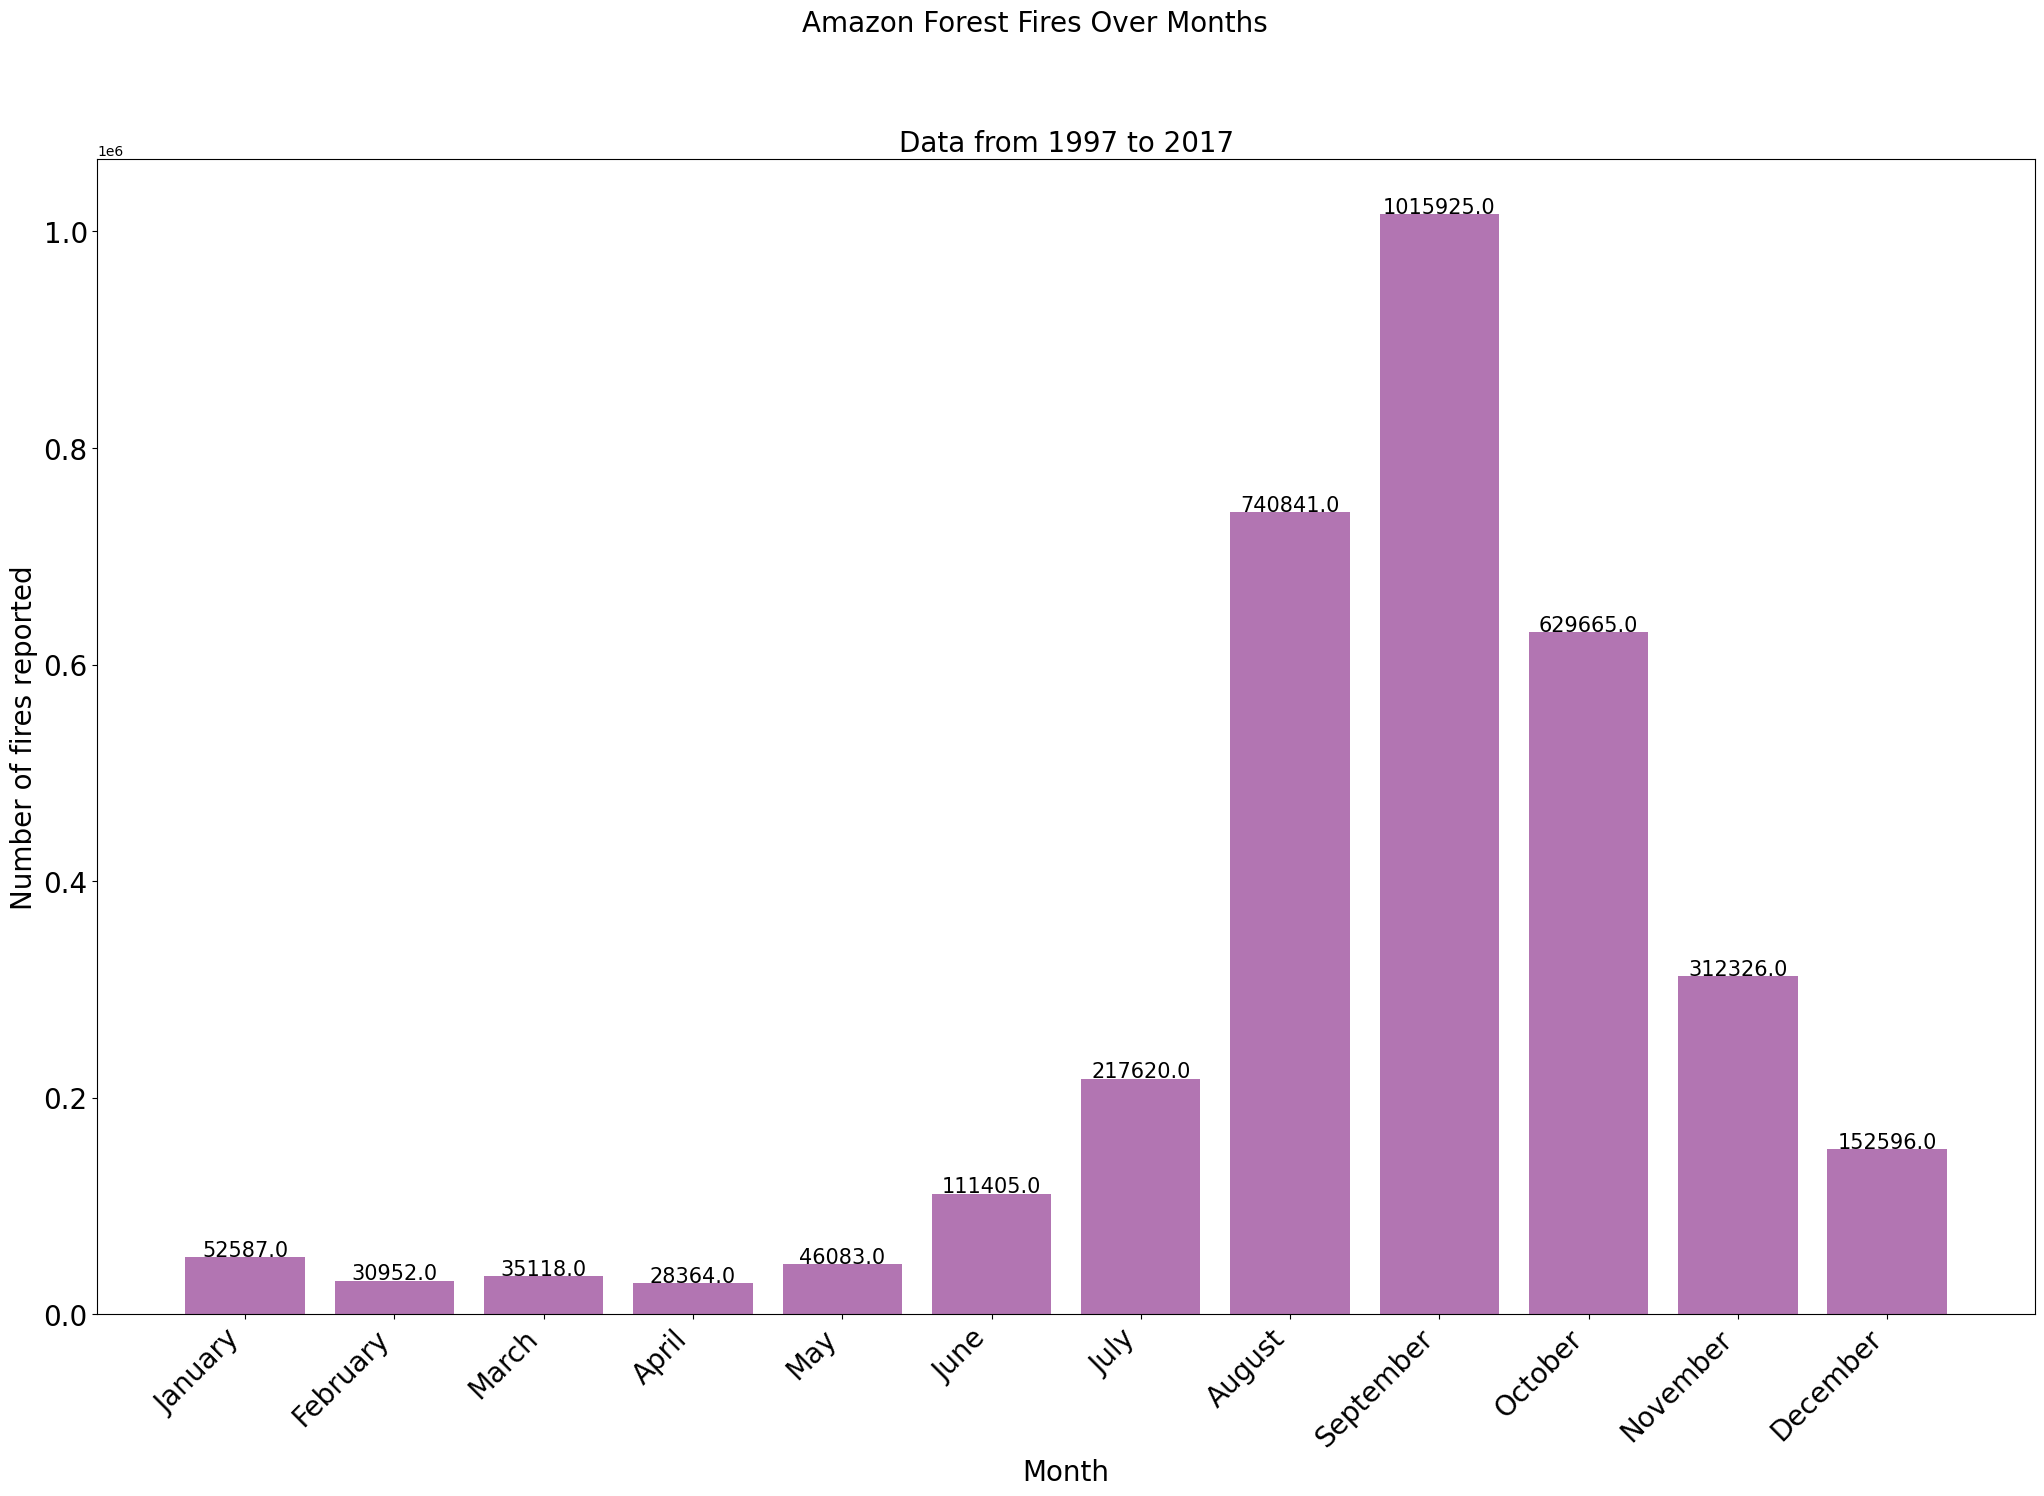

In [132]:
plt.figure(figsize=(25,15))

plt.bar(
    forest_fire_per_month['month'],
    forest_fire_per_month['number'],
    color = (0.5,0.1,0.5,0.6)
)
plt.suptitle('Amazon Forest Fires Over Months',fontsize=20)
plt.title('Data from 1997 to 2017', fontsize = 20)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Number of fires reported', fontsize = 20)

for i, num in enumerate(forest_fire_per_month['number']):
    plt.text(
    i,
        num+1000,
        num,
        ha='center',
        fontsize=15
    )
plt.setp(plt.gca().get_xticklabels(),
         rotation=45,
         horizontalalignment='right',
         fontsize= 20
    )
plt.setp(plt.gca().get_yticklabels(), fontsize= 20)